In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = "2010-01-01"
end = "2022-03-31"

In [3]:
df = data.DataReader("AAPL","yahoo",start,end)

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535085
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546382
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-25,175.279999,172.750000,173.880005,174.720001,80546200.0,174.463669
2022-03-28,175.729996,172.000000,172.169998,175.600006,90371900.0,175.342377
2022-03-29,179.009995,176.339996,176.690002,178.960007,100589400.0,178.697449
2022-03-30,179.610001,176.699997,178.550003,177.770004,92633200.0,177.509201
2022-03-31,178.029999,174.399994,177.839996,174.610001,103049300.0,174.353836


In [6]:
df = df.reset_index()

In [7]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434926
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535085
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546382
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346


In [8]:
df = df.drop(["Date","Adj Close"], axis=1)

In [9]:
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


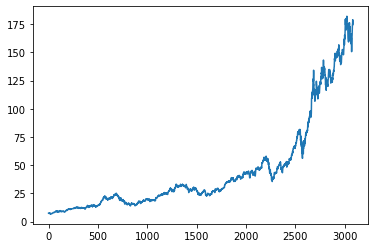

In [10]:
plt.plot(df.Close)

In [11]:
MA100 = df.Close.rolling(100).mean()

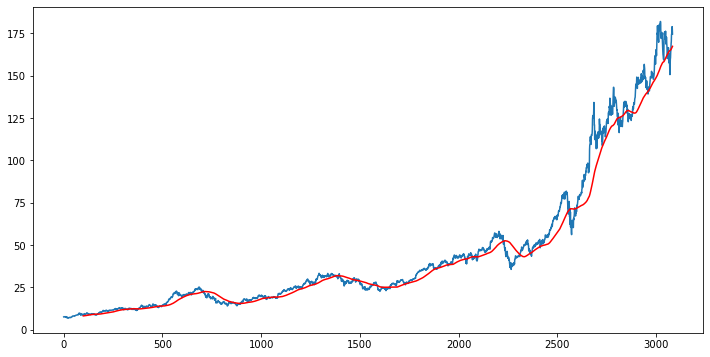

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(MA100, "r")

In [13]:
MA200 = df.Close.rolling(200).mean()

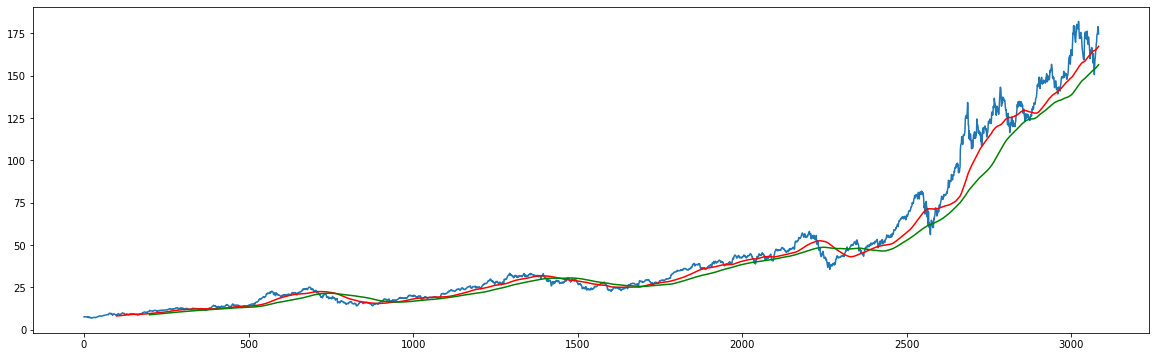

In [14]:
plt.figure(figsize=(20,6))
plt.plot(df.Close)
plt.plot(MA100, "r")
plt.plot(MA200, "g")

## Splitting Data into Training & Test

In [15]:
data_training = pd.DataFrame(df["Close"][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df["Close"][int(len(df)*0.70):int(len(df))])

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)

In [18]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

In [19]:
x_train, y_train = np.array(x_train), np.array(y_train)

# ML Model

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()

model.add(LSTM(units = 50, activation="relu", return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation="relu", return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation="relu", return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
65/65 [==============================] - 90s 1s/step - loss: 0.0347
Epoch 2/50
65/65 [==============================] - 70s 1s/step - loss: 0.0078
Epoch 3/50
65/65 [==============================] - 73s 1s/step - loss: 0.0059
Epoch 4/50
65/65 [==============================] - 72s 1s/step - loss: 0.0055
Epoch 5/50
65/65 [==============================] - 76s 1s/step - loss: 0.0052
Epoch 6/50
65/65 [==============================] - 69s 1s/step - loss: 0.0061
Epoch 7/50
65/65 [==============================] - 70s 1s/step - loss: 0.0051
Epoch 8/50
65/65 [==============================] - 70s 1s/step - loss: 0.0047
Epoch 9/50
65/65 [==============================] - 71s 1s/step - loss: 0.0050
Epoch 10/50
65/65 [==============================] - 72s 1s/step - loss: 0.0048
Epoch 11/50
65/65 [==============================] - 71s 1s/step - loss: 0.0048
Epoch 12/50
65/65 [==============================] - 70s 1s/step - loss: 0.0038
Epoch 13/50
65/65 [==============================

In [25]:
model.save("stocks-trend.h5")

In [26]:
data_testing.head()

,Close
2158,47.477501
2159,47.572498
2160,50.375000
2161,51.847500
2162,51.997501


In [27]:
past_100_days = data_training.tail(100)

In [29]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [30]:
final_df

,Close
0,43.757500
1,44.235001
2,44.994999
3,45.430000
4,44.992500
...,...
1021,174.720001
1022,175.600006
1023,178.960007
1024,177.770004


In [42]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0560553 ],
       [0.05931553],
       [0.06450456],
       ...,
       [0.97917564],
       [0.97105068],
       [0.94947516]])

In [43]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [44]:
x_test, y_test = np.array(x_test), np.array(y_test)

# Making Predictions

In [45]:
y_predicted = model.predict(x_test)

29/29 [==============================] - 8s 294ms/step


In [46]:
y_predicted.shape

(926, 1)

In [47]:
scaler.scale_

array([0.00682769])

In [48]:
scale_factor = 1/0.00682769

y_predicted = y_predicted * scale_factor

y_test = y_test * scale_factor

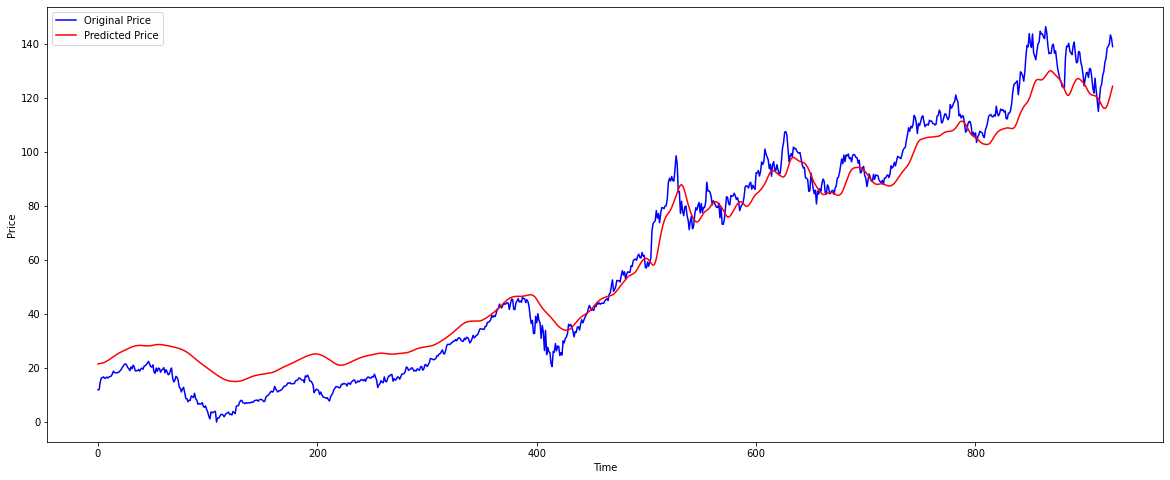

In [51]:
plt.figure(figsize=(20,8))

plt.plot(y_test, "b", label="Original Price")
plt.plot(y_predicted, "r", label="Predicted Price")

plt.xlabel("Time")
plt.ylabel("Price")

plt.legend()
plt.show()